











Preparació de les heines per la pràctica

In [92]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

Es treuen tots els atributs que siguin id, dates, objectes y aquells que siguin binaris.


Així doncs ara podreu respondre a les següents preguntes:

Quin és el tipus de cada atribut?  
Quins atributs tenen una distribució Guassiana?  
Quin és l'atribut objectiu? Per què?  

In [93]:
#Carreguem les dades
dataset = load_dataset('HRDataset_v14.csv')

In [94]:
#Mirem el tipus de cada atribut
print(dataset.dtypes)

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [95]:
dataset.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000,311.000,311.000,311.000,311.000,311.000,311.000,311.000,311.000,311.000,311.000,311.000,303.000,311.000,311.000,311.000,311.000,311.000
mean,10156.000,0.399,0.810,0.434,2.392,4.611,2.977,0.093,69020.685,0.334,16.846,6555.482,14.571,4.110,3.891,1.219,0.415,10.238
std,89.922,0.490,0.943,0.496,1.794,1.083,0.587,0.291,25156.637,0.473,6.223,16908.397,8.078,0.790,0.909,2.349,1.295,5.853
min,10001.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,45046.000,0.000,1.000,1013.000,1.000,1.120,1.000,0.000,0.000,1.000
25%,10078.500,0.000,0.000,0.000,1.000,5.000,3.000,0.000,55501.500,0.000,18.000,1901.500,10.000,3.690,3.000,0.000,0.000,5.000
50%,10156.000,0.000,1.000,0.000,1.000,5.000,3.000,0.000,62810.000,0.000,19.000,2132.000,15.000,4.280,4.000,0.000,0.000,10.000
75%,10233.500,1.000,1.000,1.000,5.000,5.000,3.000,0.000,72036.000,1.000,20.000,2355.000,19.000,4.700,5.000,0.000,0.000,15.000
max,10311.000,1.000,4.000,1.000,5.000,6.000,4.000,1.000,250000.000,1.000,30.000,98052.000,39.000,5.000,5.000,8.000,6.000,20.000


In [96]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
Re

In [97]:
# treiem els atributs que no ens interesa
atrs = dataset.columns
del(dataset['Termd'])
# Eliminem els atributs ID ya que son irrellevants

ids = []
for atr in atrs:
    if(atr[len(atr)-1] == "D" and atr[len(atr)-2] == "I"):
        del(dataset[atr])

# Eliminem els atriibuts de tipus object ya que no son utils
objs = dataset.select_dtypes(include="object").columns
for obj in objs:
    del(dataset[obj])

# Tambe hem eliminat un atribut que era null 

In [98]:
#Mirem el tipus de cada atribut
print(dataset.dtypes)

Salary                    int64
Zip                       int64
EngagementSurvey        float64
EmpSatisfaction           int64
SpecialProjectsCount      int64
DaysLateLast30            int64
Absences                  int64
dtype: object


In [99]:
dataset.describe()

,Salary,Zip,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000,311.000,311.000,311.000,311.000,311.000,311.000
mean,69020.685,6555.482,4.110,3.891,1.219,0.415,10.238
std,25156.637,16908.397,0.790,0.909,2.349,1.295,5.853
min,45046.000,1013.000,1.120,1.000,0.000,0.000,1.000
25%,55501.500,1901.500,3.690,3.000,0.000,0.000,5.000
50%,62810.000,2132.000,4.280,4.000,0.000,0.000,10.000
75%,72036.000,2355.000,4.700,5.000,0.000,0.000,15.000
max,250000.000,98052.000,5.000,5.000,8.000,6.000,20.000


In [100]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
Salary                  0
Zip                     0
EngagementSurvey        0
EmpSatisfaction         0
SpecialProjectsCount    0
DaysLateLast30          0
Absences                0
dtype: int64


In [101]:
# Guardem les dades en dues variables
dades = dataset.values
atrs = dataset.columns
x = dades[:,:]
y = dades[:,3]

<IPython.core.display.Javascript object>


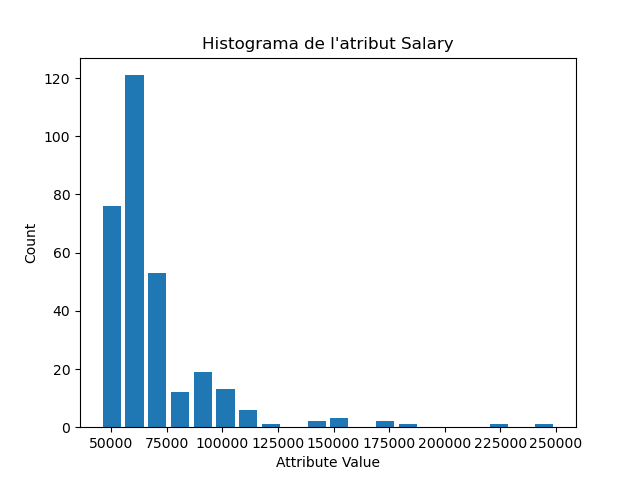

<IPython.core.display.Javascript object>


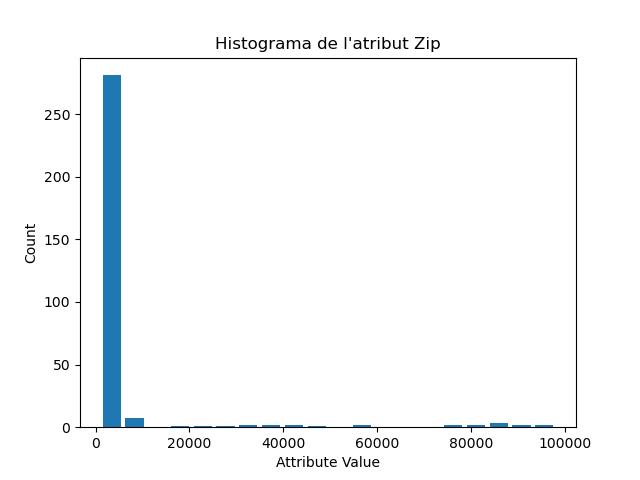

<IPython.core.display.Javascript object>


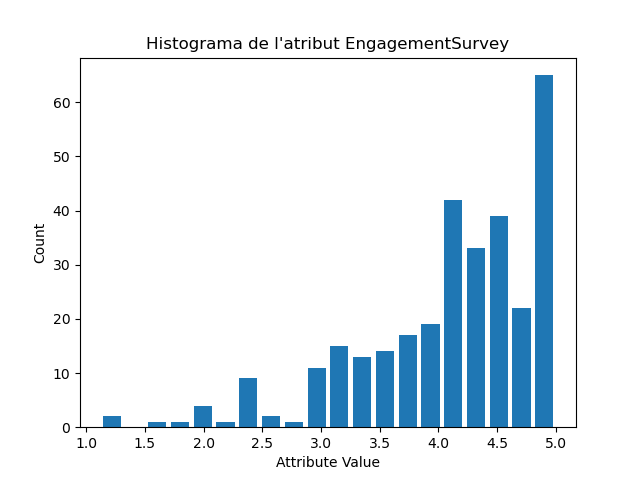

<IPython.core.display.Javascript object>


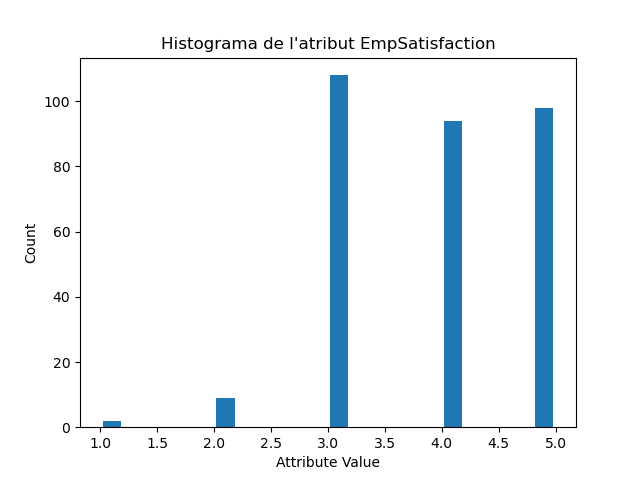

<IPython.core.display.Javascript object>


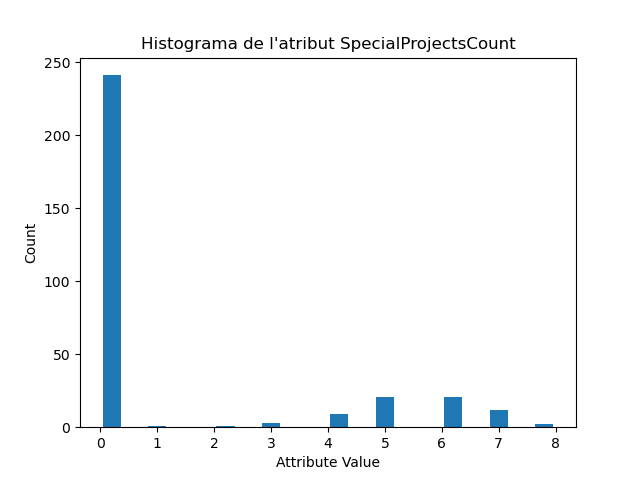

<IPython.core.display.Javascript object>


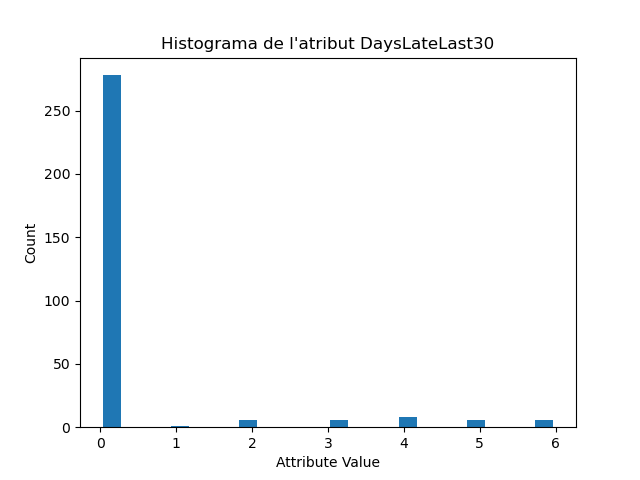

<IPython.core.display.Javascript object>


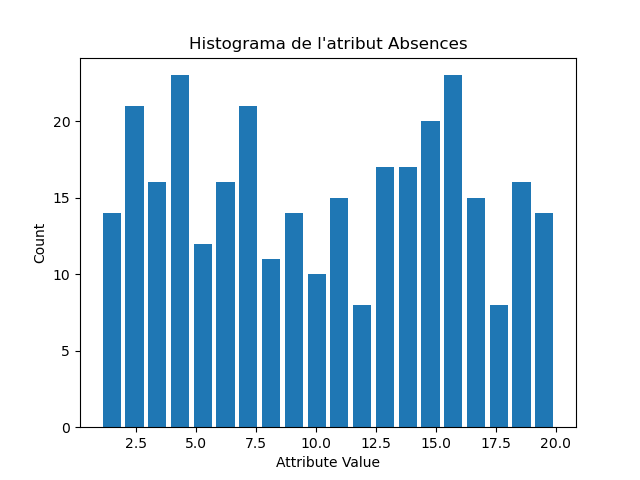

In [102]:
for i in range(x.shape[1]):
    plt.figure()
    plt.title("Histograma de l'atribut "+ atrs[i])
    plt.xlabel("Attribute Value")
    plt.ylabel("Count")
    hist = plt.hist(x[:,i], bins=20, range=[np.min(x[:,i]), np.max(x[:,i])], histtype="bar", rwidth=0.8)

<IPython.core.display.Javascript object>


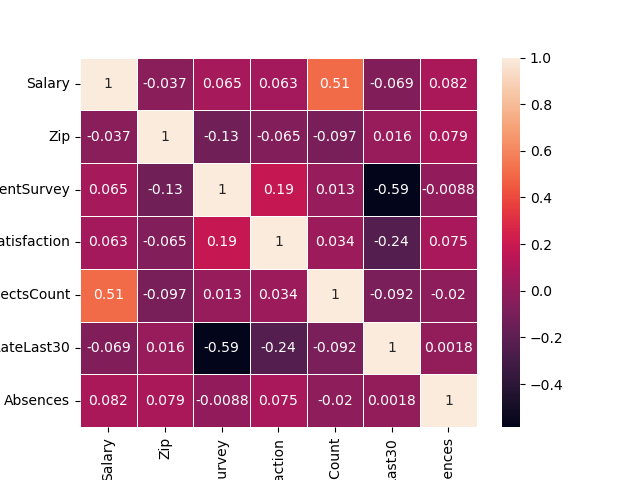

In [103]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

<IPython.core.display.Javascript object>


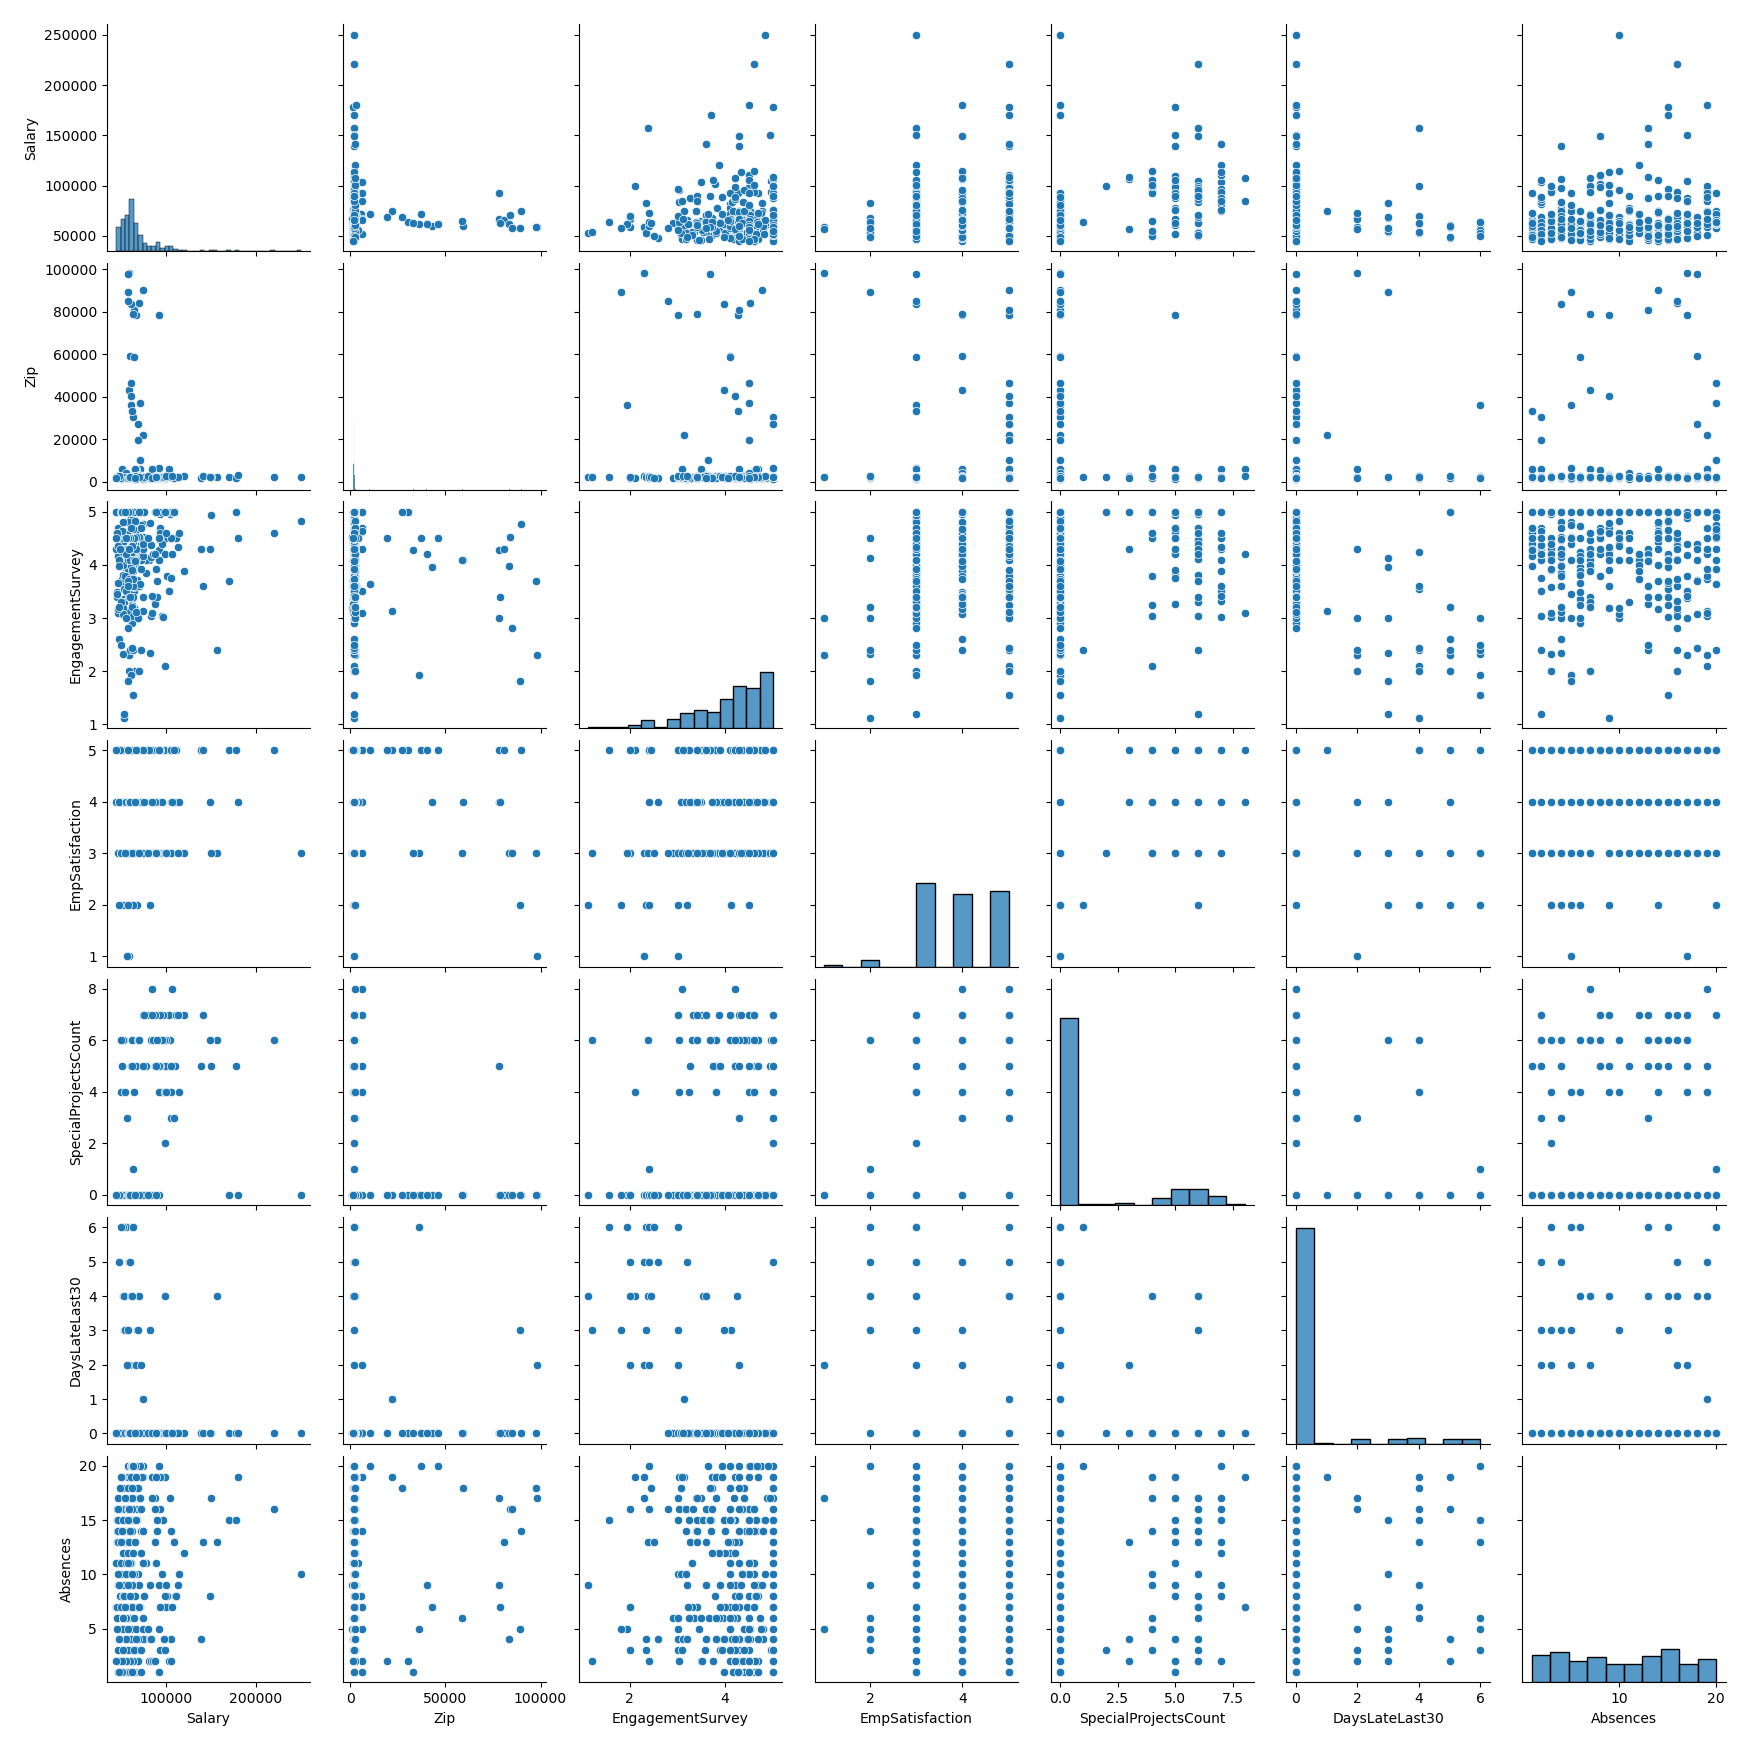

In [104]:
# Mirem la relació entre atributs utilitzant la funció pairplot
relacio = sns.pairplot(dataset)

<IPython.core.display.Javascript object>


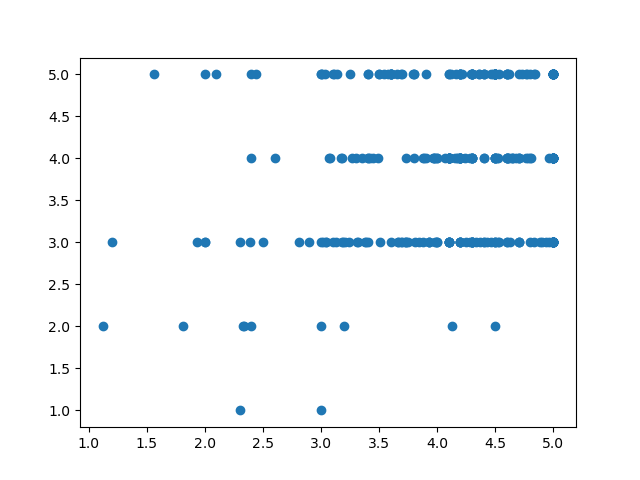

In [105]:
plt.figure()
ax = plt.scatter(x[:,2], y[:])

# Apartat (B): Primeres regressions

Per a aquest primer apartat es calcularà l'error quadràtic mitjà només del regressor per a cada un dels atributs de la base de dades, determinant aquell atribut pel qual l'error quadràtic mitjà (entre el valor predit i el real, per a cada mostra) és més baix. 

A continuació se us dona una funció auxiliar per a calcular l'error quadràtic mitjà:

In [106]:
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def mean_squeared_error(y1, y2):
    # comprovem que y1 i y2 tenen la mateixa mida
    assert(len(y1) == len(y2))
    mse = 0
    for i in range(len(y1)):
        mse += (y1[i] - y2[i])**2
    return mse / len(y1)


def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

# es pot utilitzar numpy per a calcular el mse
def mse(v1, v2):
    return ((v1 - v2)**2).mean()

def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

<IPython.core.display.Javascript object>


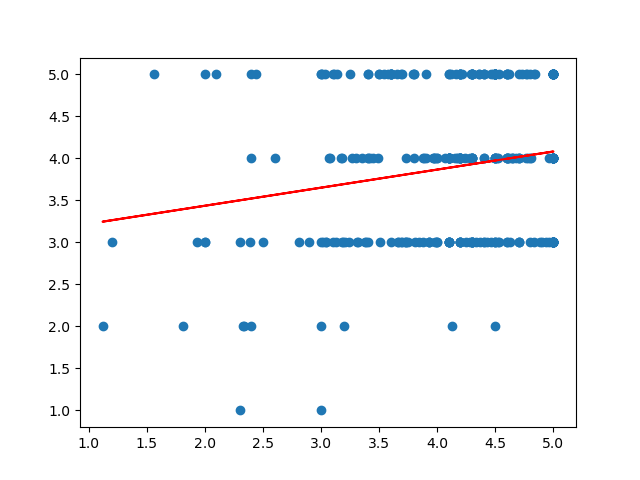

Mean squeared error:  0.7952119457581808
R2 score:  0.03500834831781341


In [107]:
# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
atribut1 = x[:,2].reshape(x.shape[0], 1) 
regr = regression(atribut1, y) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,2], y)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

<IPython.core.display.Javascript object>


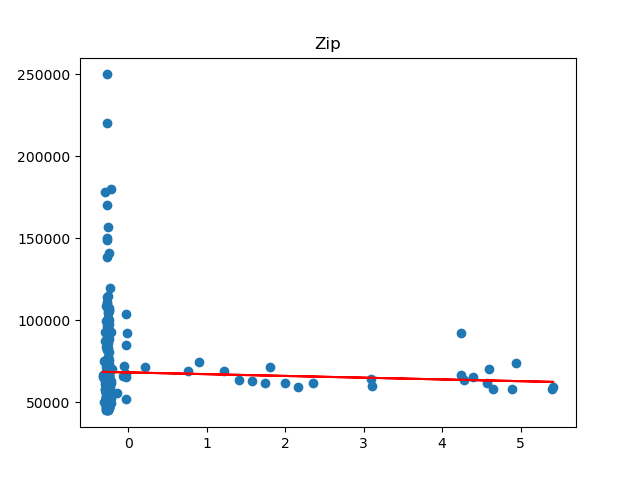

Salary vs Zip
Mean squeared error:  542477559.7244322
R2 score:  0.0021939986303658454



<IPython.core.display.Javascript object>


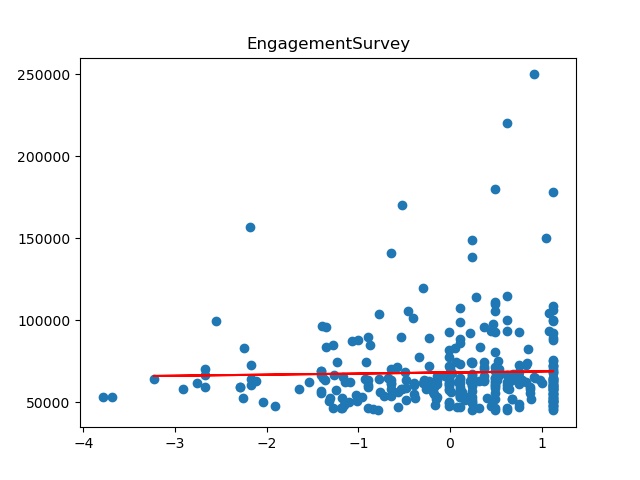

Salary vs EngagementSurvey
Mean squeared error:  543251883.4791137
R2 score:  0.0007697463722322606



<IPython.core.display.Javascript object>


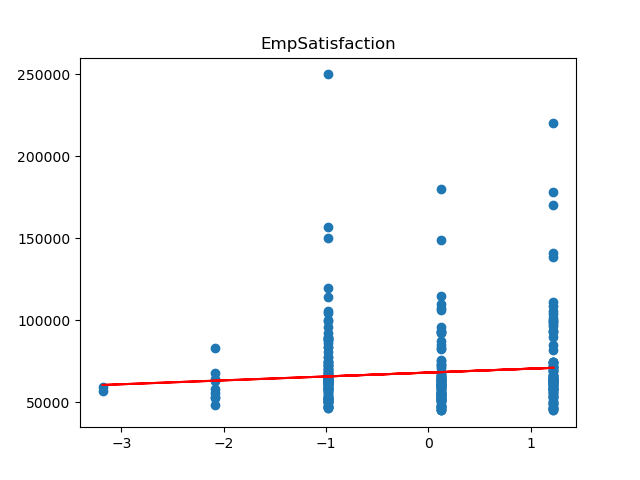

Salary vs EmpSatisfaction
Mean squeared error:  537996156.3274778
R2 score:  0.010436867158071905



<IPython.core.display.Javascript object>


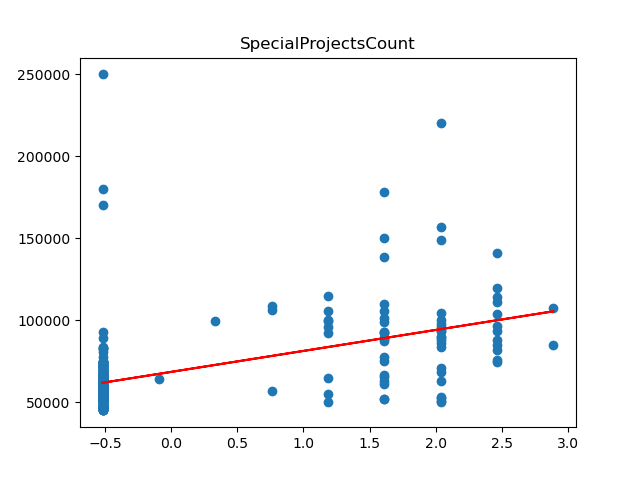

Salary vs SpecialProjectsCount
Mean squeared error:  388174639.5800811
R2 score:  0.2860110468915027



<IPython.core.display.Javascript object>


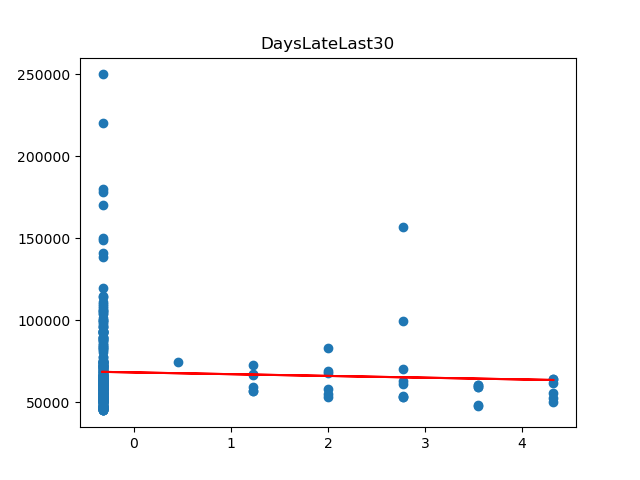

Salary vs DaysLateLast30
Mean squeared error:  542462927.357983
R2 score:  0.0022209126709479277



<IPython.core.display.Javascript object>


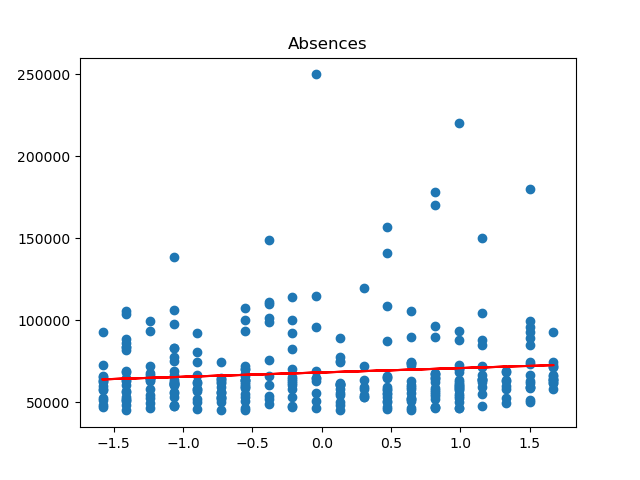

Salary vs Absences
Mean squeared error:  536504885.789473
R2 score:  0.013179835352448044



In [108]:
x = dades[:,:]
y = dades[:,0]
x = standarize(x)

x_train, y_train, x_val, y_val = split_data(x, y)

y_train = y_train.reshape(y_train.shape[0], 1)

for i in range(1,len(atrs)):
    atribut1 = (x_train[:,i].reshape(x_train.shape[0], 1)) 
    regr = regression(atribut1, y_train) 
    predicted = regr.predict(atribut1)

    # Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
    
    plt.figure()
    plt.title(atrs[i])
    ax = plt.scatter(x[:,i], y)
    plt.plot(atribut1[:,0], predicted, 'r')
    
    # Mostrem l'error (MSE i R2)
    MSE = mse(y_train, predicted)
    r2 = r2_score(y_train, predicted)
    print("Salary vs " + atrs[i])
    print("Mean squeared error: ", MSE)
    print("R2 score: ", r2)
    print('')